# In this notebook the code requirements are tested

In [52]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [81]:
# the Nmin value used is the following
m = 20
m_10 = 10

In [4]:
# the minimum distance between receivers is 100 meters. With a sound speed of approximately 1500 meters a second this means
delta_T = 0.0666

In [100]:
# loop through different number of hydrophones
N = np.linspace(0, 1500, 101)

# loop through different noise rates
f = np.logspace(-1, 1.5, 30)
#f = np.linspace(0, 30, 100)

print(N)
print(f)

[   0.   15.   30.   45.   60.   75.   90.  105.  120.  135.  150.  165.
  180.  195.  210.  225.  240.  255.  270.  285.  300.  315.  330.  345.
  360.  375.  390.  405.  420.  435.  450.  465.  480.  495.  510.  525.
  540.  555.  570.  585.  600.  615.  630.  645.  660.  675.  690.  705.
  720.  735.  750.  765.  780.  795.  810.  825.  840.  855.  870.  885.
  900.  915.  930.  945.  960.  975.  990. 1005. 1020. 1035. 1050. 1065.
 1080. 1095. 1110. 1125. 1140. 1155. 1170. 1185. 1200. 1215. 1230. 1245.
 1260. 1275. 1290. 1305. 1320. 1335. 1350. 1365. 1380. 1395. 1410. 1425.
 1440. 1455. 1470. 1485. 1500.]
[ 0.1         0.12195705  0.14873521  0.18139307  0.22122163  0.26979536
  0.32903446  0.4012807   0.48939009  0.5968457   0.72789538  0.88771971
  1.08263673  1.32035178  1.61026203  1.963828    2.39502662  2.92090372
  3.56224789  4.3444123   5.29831691  6.46167079  7.88046282  9.61077966
 11.72102298 14.29461338 17.43328822 21.26112334 25.92943797 31.6227766 ]


In [101]:
# initialise an empty 2D array
result = np.zeros((len(N), len(f)))
result_10 = np.zeros((len(N), len(f)))

In [102]:
# loop through the variables and safe to result array
for i in range(0, len(N)):
    for j in range(0, len(f)):
        N_i = N[i]
        f_j = f[j]
        
        # calculate the result
        req = (1 / math.factorial(m)) * (N_i * f_j) * (N_i * f_j * delta_T)**(m - 1)
        req_10 = (1 / math.factorial(m_10)) * (N_i * f_j) * (N_i * f_j * delta_T)**(m_10 - 1)

        result[i, j] = req
        result_10[i, j] = req_10

In [103]:
# replace values greater than 1 with 1
result[result > 1] = 1
result_10[result_10 > 1] = 1

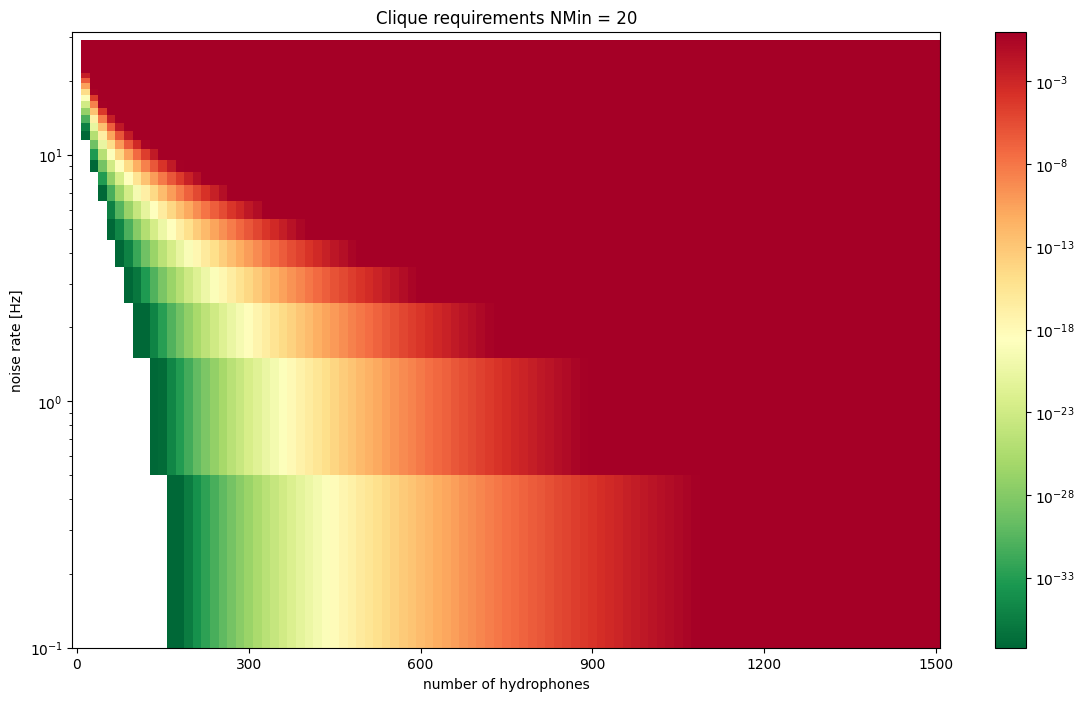

In [104]:
# create a colormap from the custom colors
cmap = 'RdYlGn_r'

# create a plot minimum frequency
plt.figure(figsize=(14, 8))
plt.imshow(result.T, cmap=cmap, interpolation='nearest', norm=LogNorm())

# add color bar
cbar = plt.colorbar()

# set axis labels and ticks
plt.xlabel('number of hydrophones')
plt.ylabel('noise rate [Hz]')

# set y-axis to log scale
plt.yscale('log')
plt.gca().set_aspect('auto')

# show plot
plt.title(f'Clique requirements NMin = 20')
plt.grid(False)
plt.ylim(10**-1, 10**1.5)
plt.xticks

# plot new x-axis tick labels
new_xticks = [0, 20, 40, 60, 80, 100] 
new_xlabels = ['0', '300', '600', '900', '1200', '1500']
plt.xticks(new_xticks, new_xlabels)
plt.show()

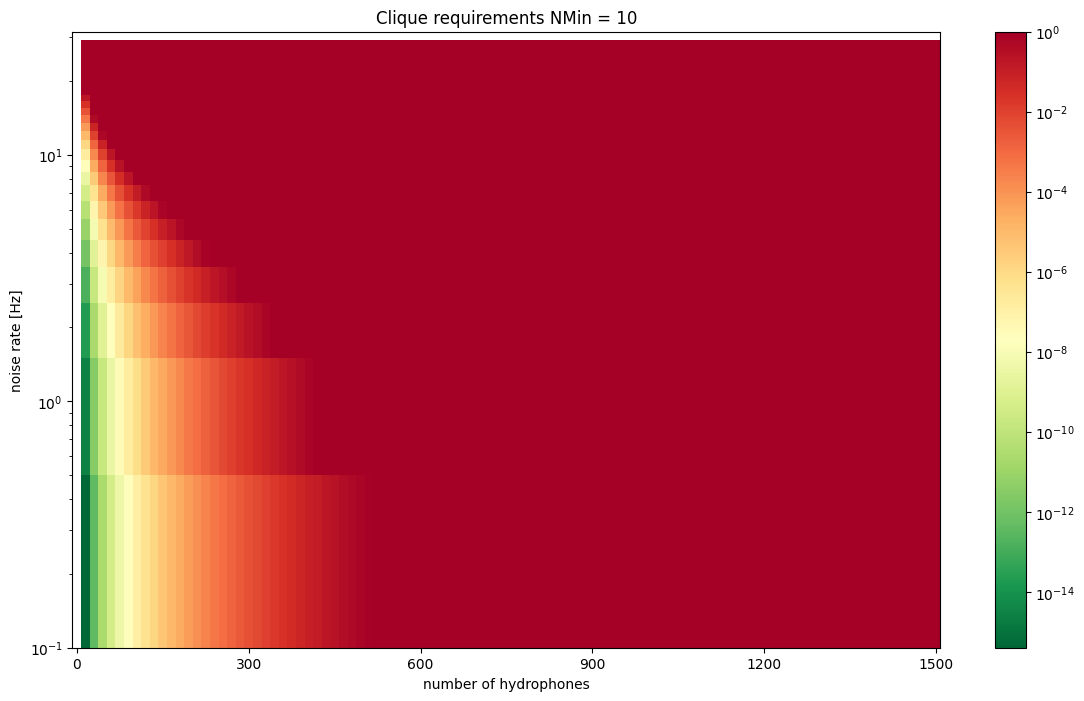

In [105]:
# create a colormap from the custom colors
cmap = 'RdYlGn_r'

# create a plot minimum frequency
plt.figure(figsize=(14, 8))
plt.imshow(result_10.T, cmap=cmap, interpolation='nearest', norm=LogNorm())

# add color bar
cbar = plt.colorbar()

# set axis labels and ticks
plt.xlabel('number of hydrophones')
plt.ylabel('noise rate [Hz]')

# set y-axis to log scale
plt.yscale('log')
plt.gca().set_aspect('auto')

# show plot
plt.title(f'Clique requirements NMin = 10')
plt.grid(False)
plt.ylim(10**-1, 10**1.5)
plt.xticks

# plot new x-axis tick labels
new_xticks = [0, 20, 40, 60, 80, 100] 
new_xlabels = ['0', '300', '600', '900', '1200', '1500']
plt.xticks(new_xticks, new_xlabels)
plt.show()